In [117]:
! pip3 install wordcloud

You are using pip version 19.0.3, however version 21.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [47]:
import plotly.graph_objs as go
import plotly
import plotly.express as px
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import collections
import seaborn as sns
from wordcloud import WordCloud
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected = True)

dataframe = pd.read_csv("data.csv")

complementary_colors = ["#694489", "#604e70", "#894487", "#474489", "#855aaa", "#c792ea", "#614bcc"]


In [97]:

x=['Winter', 'Spring', 'Summer', 'Fall']

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=x, y=[40, 60, 40, 10],
    hoverinfo='x+y',
    mode='lines',
    line=dict(width=0.5, color='rgb(131, 90, 241)'),
    stackgroup='one' # define stack group
))
fig.add_trace(go.Scatter(
    x=x, y=[20, 10, 10, 60],
    hoverinfo='x+y',
    mode='lines',
    line=dict(width=0.5, color='rgb(111, 231, 219)'),
    stackgroup='one'
))
fig.add_trace(go.Scatter(
    x=x, y=[40, 30, 50, 30],
    hoverinfo='x+y',
    mode='lines',
    line=dict(width=0.5, color='rgb(184, 247, 212)'),
    stackgroup='one'
))

fig.update_layout(yaxis_range=(0, 100))
fig.show()

In [75]:


# create list of column names to iterate through
columns = ["Where did you work for your 1st coop ?", "Where did you work for your 2nd coop ?", "Where did you work for your 3rd coop ?", "Where did you work for your 4th coop ?", "Where did you work for your 5th coop ?", "Where did you work for your 6th coop ? (Even if it was remote, you can just put in the location of where you would have worked if COVID never happened)"]
cities = ["Toronto", "GTA (Outside of Toronto)", "Ottawa", "Windsor", "Vancouver", "KW", "Other Ontario", "Montreal", "New York City", "SF / Bay Area", "Seattle", "Boston", "Los Angeles", "Other USA", "Other Canada","UK","Germany","Anywhere (E-Coop)","Remote"]
# "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])

colors_1 = sns.color_palette("husl", 20)
#colors_1 = sns.color_palette("Paired", 20)



dist = collections.defaultdict(list)

for city in cities:
    dist[city] = [0,0,0,0,0,0]

for i in range(len(columns)):
    column = columns[i]
    values = dataframe[column][9:].value_counts()
    for city, freq in values.items():
        dist[city][i] = freq

x = ["1st co-op", "2nd co-op", "3rd co-op", "4th co-op", "5th co-op", "6th co-op"]
fig = go.Figure()

i = 0
for city, freq in dist.items():
    fig.add_trace(go.Scatter(
        x=x, y=freq,
        hoverinfo='x+y',
        mode='lines',
        line=dict(width=0.7, color='rgb' + str(colors_1[i])),
        stackgroup='one',
        name=city
    ))
    i+=1

fig.update_layout(yaxis_range=(0, 45))
fig.update_layout(width=1500, height=1000)
fig.show()


defaultdict(<class 'int'>, {'Process Improvement Analyst': 1, 'Software Tester': 2, 'Machine Learning Engineer': 3, 'Production Control Specialist': 1, 'Business Analyst': 11, 'Product Coordinator': 1, 'Technical Project Lead': 1, 'Continuous Improvement Analyst': 2, 'Delivery Coordinator': 1, 'Product Manager': 25, 'Program Manager': 4, 'Devops Engineer': 1, 'Site Reliability Engineer': 1, 'Cybersecurity Consultant': 1, 'Software Developer': 19, 'Business Systems Analyst': 1, 'Agile Coach': 1, 'Data Analyst': 8, 'IT Operations Analyst': 1, 'Data Analytics Consultant': 1, 'Quantitative Researcher': 1, 'Technical Program Manager': 2, 'Technical Account Manager': 1, 'Project Engineering Intern': 1, 'Project Analyst': 1, 'Project Manager': 8, 'Strategic Sourcing Analyst': 1, 'Business Intelligence Intern': 1, 'IoT Engineer': 1, 'Data Analytics Intern': 1, 'Data Scientist': 3, 'Data Scientist ': 1, 'Project Coordinator': 2, 'Sales Representative': 1, 'Change Management Intern': 1, 'Busines

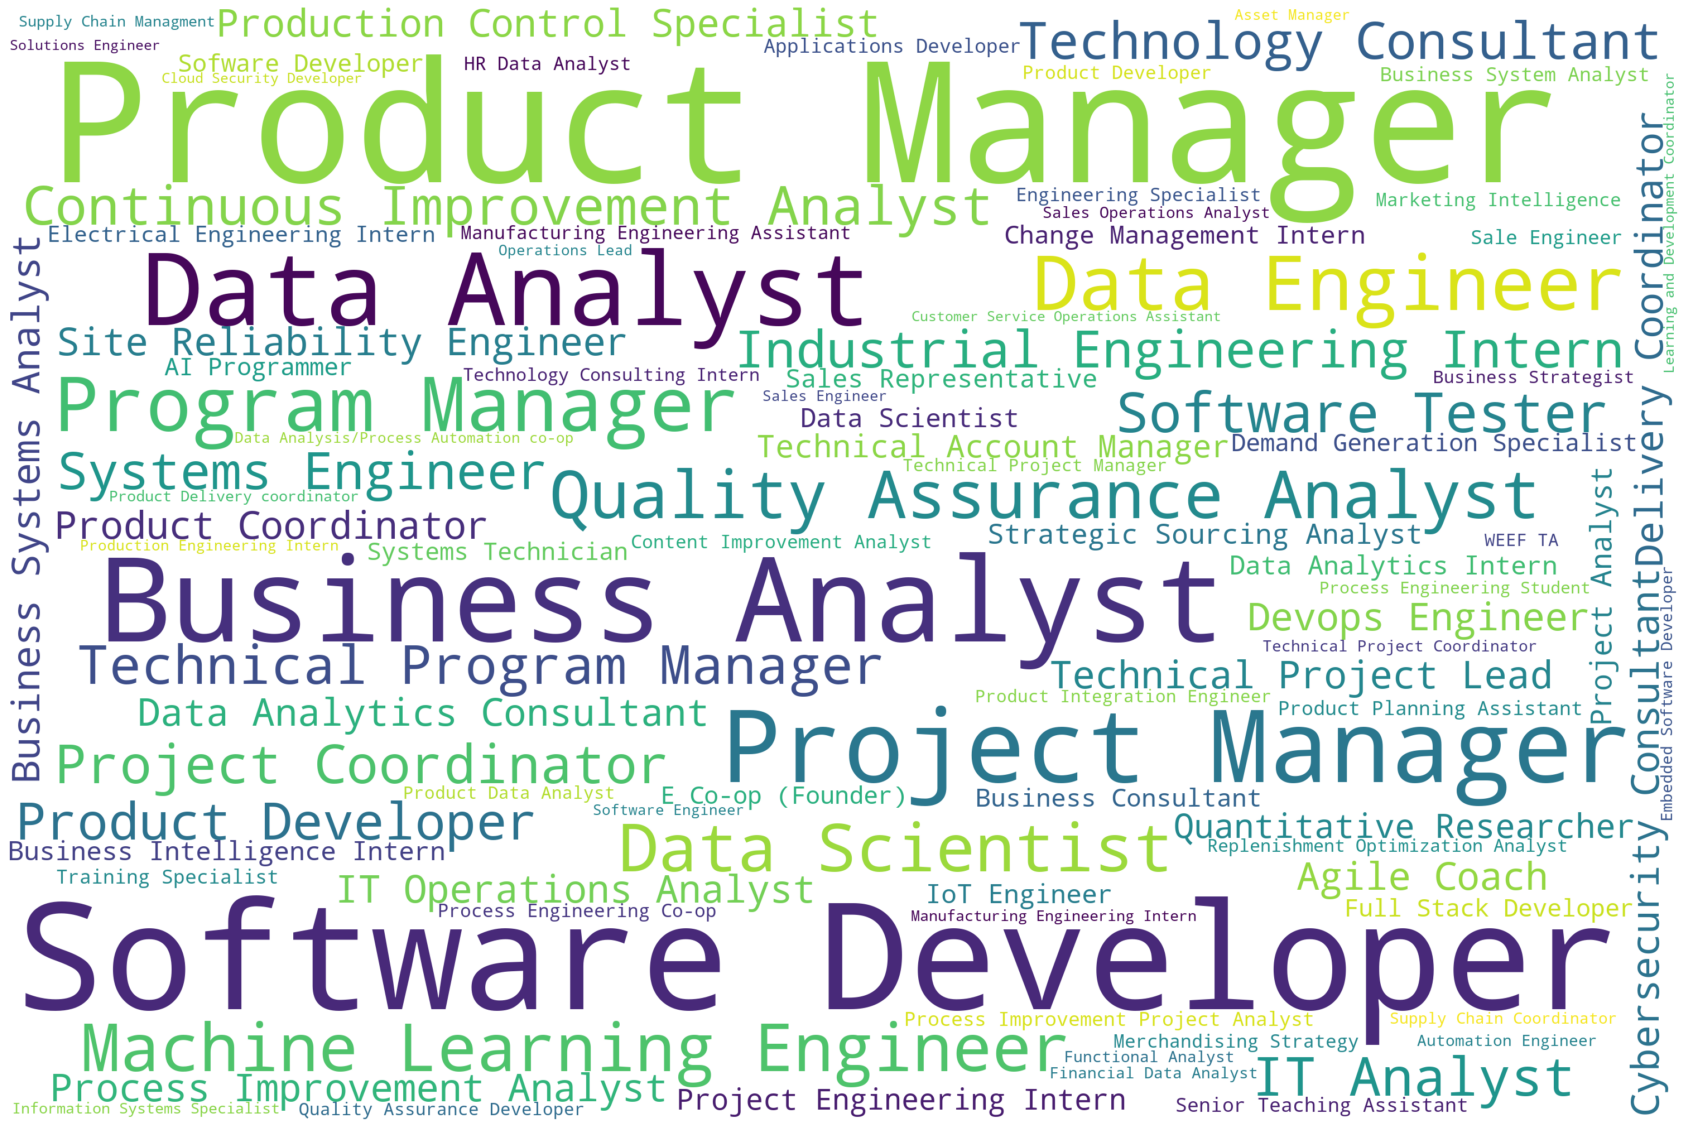

In [144]:
data = pd.read_csv("job titles.csv")
column = data["Job Titles"]
dist = collections.defaultdict(int)

colors = sns.color_palette("husl", 96)
sentence = ""

for i, line in column.iteritems():
    # split line into tokens (comma separated)
    ll = line.split(", ")
    for token in ll:
        dist[token] += 1
print(dist)



from wordcloud import WordCloud
# Generate word cloud
wordcloud = WordCloud(background_color='white', width = 3000, height = 2000)
wordcloud.generate_from_frequencies(frequencies=dist)
plt.figure(figsize=(30,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


# Evaluations

In [27]:


# create list of column names to iterate through
columns = ["What was your coop evaluation in your 1st coop?", "What was your coop evaluation in your 2nd coop?", "What was your coop evaluation in your 3rd coop?", "What was your coop evaluation in your 4th coop?", "What was your coop evaluation in your 5th coop?", "What was your coop evaluation in your 6th coop?"]
ratings = ["Outstanding", "Excellent", "Very Good", "Good", "Satisfactory"]
# "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])

colors_1 = sns.color_palette("husl", 5)
#colors_1 = sns.color_palette("Paired", 20)



dist = collections.defaultdict(list)

for r in ratings:
    dist[r] = [0,0,0,0,0,0]

for i in range(len(columns)):
    column = columns[i]
    values = dataframe[column][9:].value_counts()
    print(values)
    for r, freq in values.items():
        dist[r][i] = freq

x = ["1st co-op", "2nd co-op", "3rd co-op", "4th co-op", "5th co-op", "6th co-op"]
fig = go.Figure()

i = 0
for city, freq in dist.items():
    fig.add_trace(go.Scatter(
        x=x, y=freq,
        hoverinfo='x+y',
        mode='lines',
        line=dict(width=0.7, color='rgb' + str(colors_1[i])),
        stackgroup='one',
        name=city
    ))
    i+=1

fig.update_layout(yaxis_range=(0, 45))
fig.update_layout(width=1500, height=1000)
fig.show()


Excellent      21
Outstanding    11
Very Good       8
Good            1
Name: What was your coop evaluation in your 1st coop?, dtype: int64
Excellent       18
Outstanding     17
Very Good        5
Good             2
Satisfactory     1
Name: What was your coop evaluation in your 2nd coop?, dtype: int64
Outstanding    25
Excellent      11
Very Good       7
Name: What was your coop evaluation in your 3rd coop?, dtype: int64
Outstanding    21
Excellent      16
Very Good       6
Name: What was your coop evaluation in your 4th coop?, dtype: int64
Outstanding    22
Excellent      15
Very Good       4
Name: What was your coop evaluation in your 5th coop?, dtype: int64
Outstanding    27
Excellent      11
Very Good       2
Name: What was your coop evaluation in your 6th coop?, dtype: int64


# Companies

defaultdict(<class 'int'>, {'TSC Stores LP': 1, 'NCR Corp': 1, 'Loblaw Companies Limited': 1, 'Toyota': 6, 'RideCo': 3, 'Northbridge': 3, 'Flipp': 3, 'Rangle.io': 1, 'ProjectEd': 1, 'Scene': 1, 'Imagine Communications': 1, 'PWO Canada': 1, 'Plangrid': 1, 'Lifion by ADP': 2, 'Longview': 1, 'Manorlead': 1, 'Manulife': 6, 'Element AI': 1, 'CBRE': 1, 'Canadian Food Inspection Agency': 1, 'KPMG': 2, 'Quadeye': 1, 'Trifacta': 1, 'Apple': 2, 'Bombardier': 2, 'Motorola': 1, 'BlackBerry': 2, 'University Health Network': 2, 'Wayfair': 2, 'University of Waterloo': 2, 'Toronto Pearson International Airport': 1, 'Global Affairs Canada': 1, 'Shoplogix': 1, 'Loblaw Digital': 6, 'BMO': 1, 'Mejuri': 1, 'Bell Canada': 1, 'WalterFedy': 2, 'SAP': 1, 'Avidbots': 1, 'Datadog': 3, 'Cinchy': 1, 'SeamlessMD': 2, 'AGF Investments': 1, 'Accedo': 2, 'Skylight': 1, 'OANDA': 1, 'Boss Insights': 1, 'Ground News': 1, 'Universe': 1, 'Ministry of the Attorney General': 1, 'Department of National Defence': 2, 'Sprout at

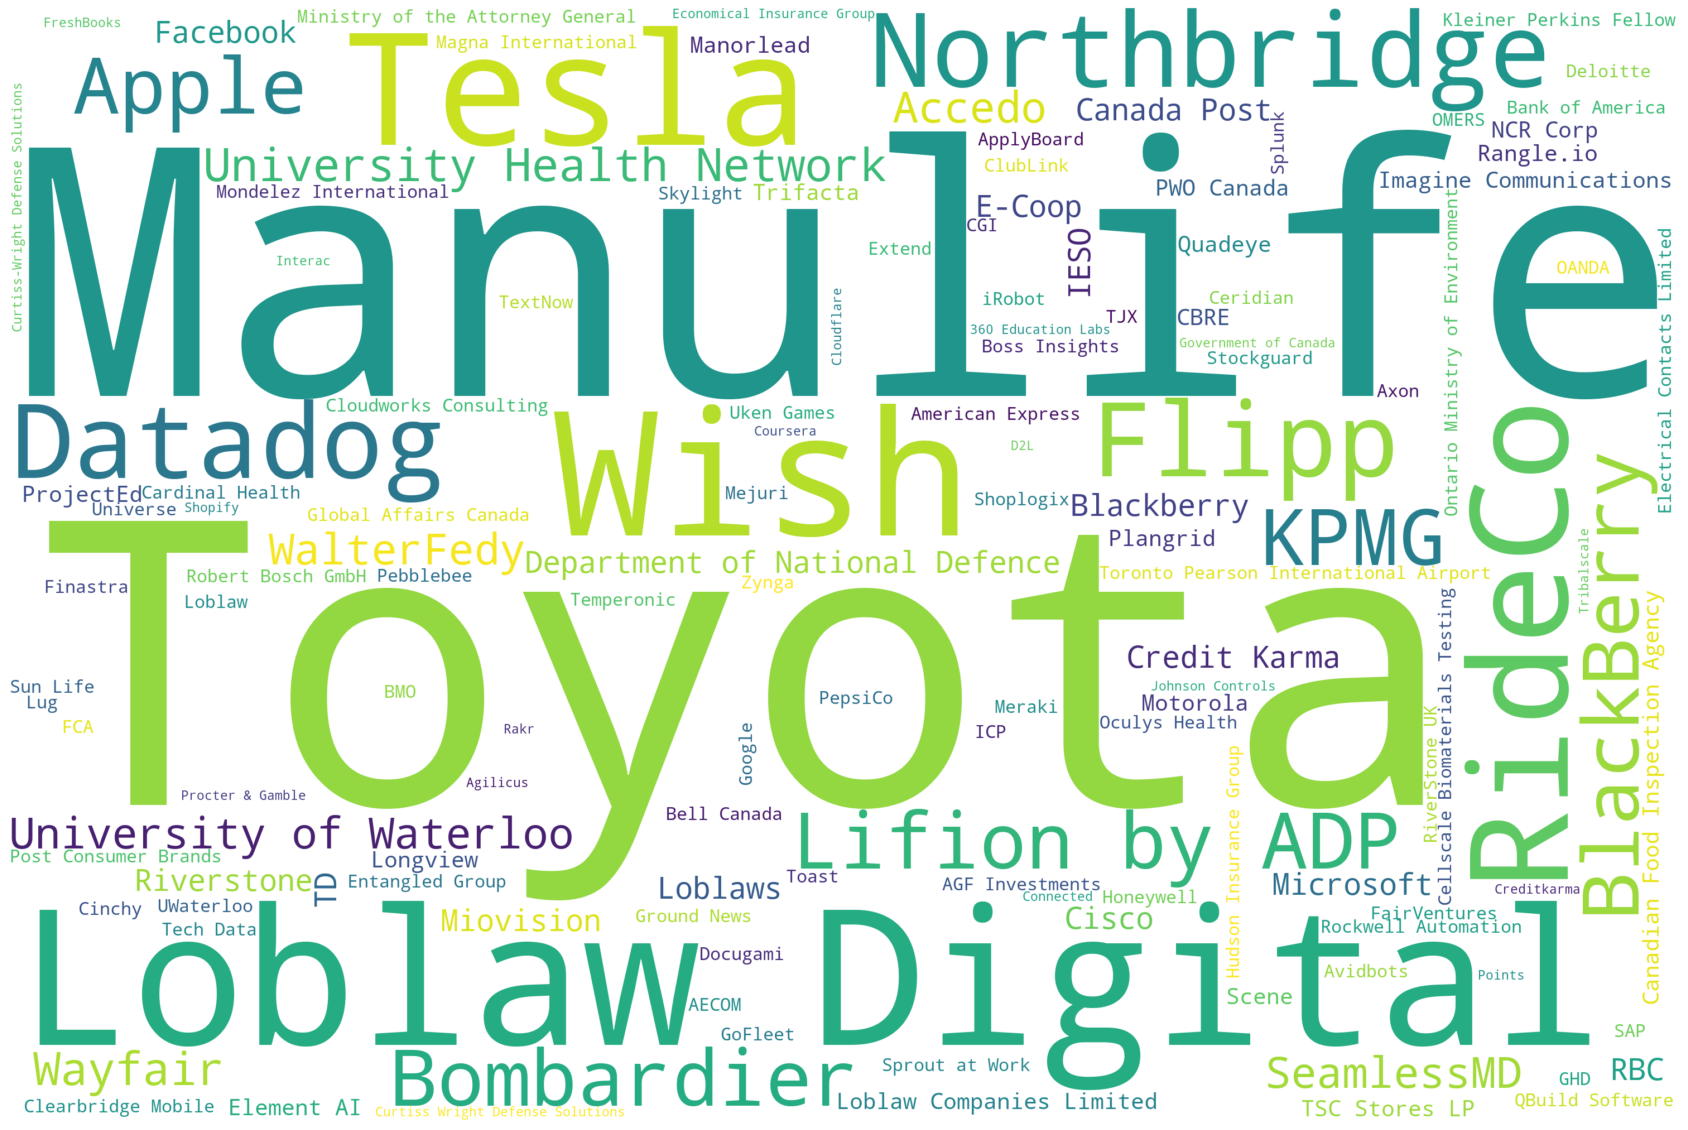

In [24]:
data = pd.read_csv("data.csv", sep=",", keep_default_na=False)
column = data["Please list the companies that you've interned at:"]
dist = collections.defaultdict(int)

#colors = sns.color_palette("husl", 96)
for i, line in column.iteritems():
    # split line into tokens (comma separated)
    if len(line) == 0:
        continue
    else:
        ll = line.split(", ")
        for token in ll:
            dist[token] += 1

from wordcloud import WordCloud
# Generate word cloud
wordcloud = WordCloud(background_color='white', width = 3000, height = 2000)
wordcloud.generate_from_frequencies(frequencies=dist)
plt.figure(figsize=(30,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# hourly salary

In [48]:


# create list of column names to iterate through
columns = ["What was your hourly salary (CAD) for your 1st coop?", "What was your hourly salary (CAD) for your 2nd coop?", "What was your hourly salary (CAD) for your 3rd coop?", "What was your hourly salary (CAD) for your 4th coop?", "What was your hourly salary (CAD) for your 5th coop?", "What was your hourly salary (CAD) for your 6th coop?",]
ratings = ["< 10", "10 - 20", "20 - 30", "30 - 40", "40 - 50", "50 - 60", "60 <"]

colors_1 = sns.color_palette("husl", 7)
#colors_1 = sns.color_palette("Paired", 20)



dist = collections.defaultdict(list)

for r in ratings:
    dist[r] = [0,0,0,0,0,0]

for i in range(len(columns)):
    column = columns[i]
    values = dataframe[column][9:].value_counts()
    print(values)
    for r, freq in values.items():
        dist[r][i] = freq

x = ["1st co-op", "2nd co-op", "3rd co-op", "4th co-op", "5th co-op", "6th co-op"]
fig = go.Figure()

i = 0
for r, freq in dist.items():
    fig.add_trace(go.Scatter(
        x=x, y=freq,
        hoverinfo='x+y',
        mode='lines',
        line=dict(width=0.7, color='rgb' + str(colors_1[i])),
        stackgroup='one',
        name=r
    ))
    i+=1

fig.update_layout(yaxis_range=(0, 45))
fig.update_layout(width=1500, height=1000)
fig.show()


10 - 20    27
20 - 30    13
< 10        2
40 - 50     1
Name: What was your hourly salary (CAD) for your 1st coop?, dtype: int64
20 - 30    25
10 - 20    18
Name: What was your hourly salary (CAD) for your 2nd coop?, dtype: int64
20 - 30    35
30 - 40     4
10 - 20     2
40 - 50     1
60 <        1
Name: What was your hourly salary (CAD) for your 3rd coop?, dtype: int64
20 - 30    22
30 - 40     9
10 - 20     3
50 - 60     3
40 - 50     2
60 <        2
< 10        1
Name: What was your hourly salary (CAD) for your 4th coop?, dtype: int64
30 - 40    11
20 - 30    10
40 - 50     7
60 <        7
50 - 60     6
Name: What was your hourly salary (CAD) for your 5th coop?, dtype: int64
20 - 30    16
30 - 40    13
60 <        5
50 - 60     3
10 - 20     2
40 - 50     1
< 10        1
Name: What was your hourly salary (CAD) for your 6th coop?, dtype: int64
